<a href="https://colab.research.google.com/github/AlvinNH11/AlvinNH11/blob/main/BDDM7_ALVIN_NAUVAL_HARITS_22_11_4546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nilai yang hilang:
 No                          0
Usia                        0
Jenis Kelamin               0
Gejalah                     0
Durasi Gejalah              0
Riwayat Kesehatan           0
Pemeriksaan Fisik           0
Pemeriksaan Laboratorium    0
Genetik                     0
Faktor Resiko Lainnya       0
Data Komorbidatas           0
Kronologi Gejalah           0
dtype: int64

Jumlah kasus yang dicurigai DBD: 42

Informasi Tambahan tentang Kolom-kolom:

Kolom: No 
Tipe Data: int64
Jumlah Nilai Unik: 42
Lima Nilai Pertama:
0    1
1    2
2    3
3    4
4    5
Name: No , dtype: int64

Kolom: Usia
Tipe Data: int64
Jumlah Nilai Unik: 13
Lima Nilai Pertama:
0    25
1    40
2    20
3    30
4    25
Name: Usia, dtype: int64

Kolom: Jenis Kelamin
Tipe Data: object
Jumlah Nilai Unik: 3
Lima Nilai Pertama:
0    Perempuan
1    Laki-laki
2    Perempuan
3    Perempuan
4    Perempuan
Name: Jenis Kelamin, dtype: object
Lima Nilai Unik Pertama:
['Perempuan' 'Laki-laki' 'laki-laki']

Kolom: 

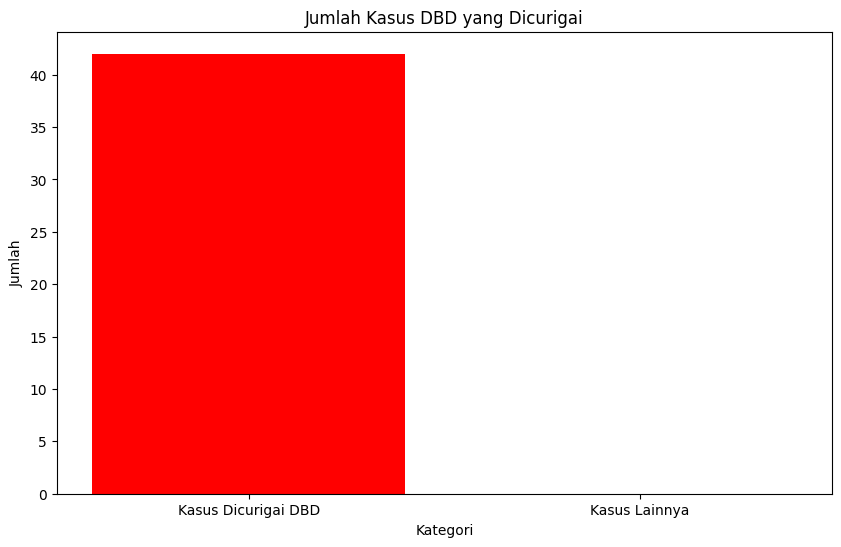

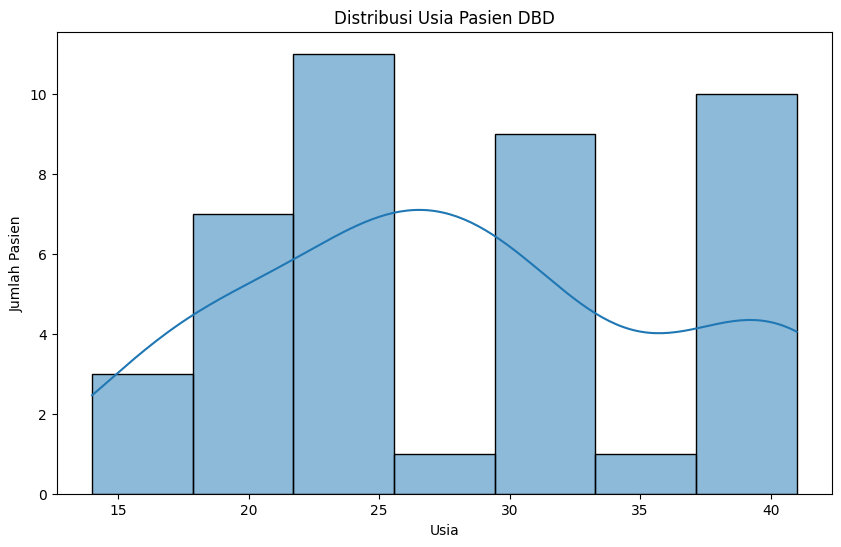

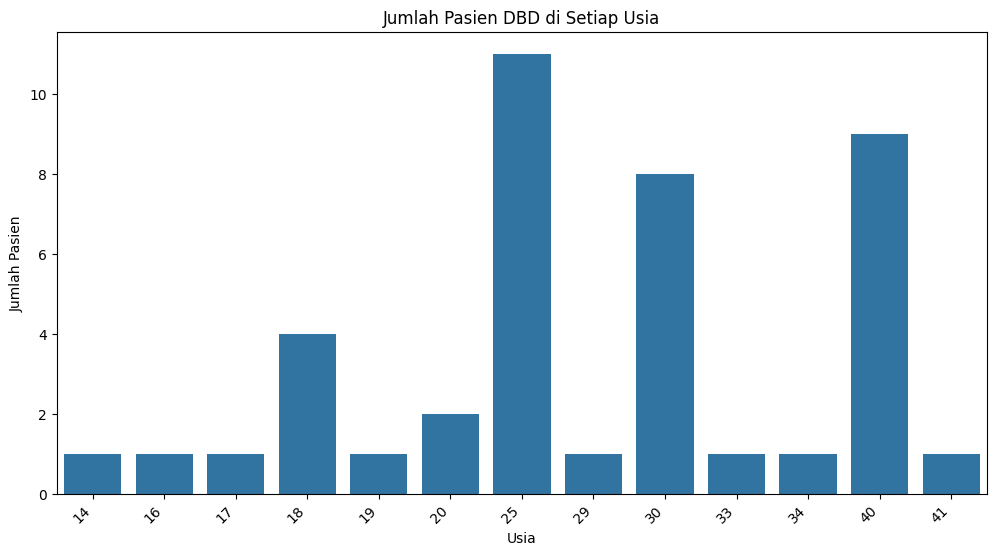


Error: Kolom tidak ditemukan: "None of [Index(['demamDBD_dicurigai', 'mualDBD_dicurigai', 'muntahDBD_dicurigai',\n       'nyeri ototDBD_dicurigai', 'nyeri sendiDBD_dicurigai',\n       'perdarahanDBD_dicurigai', 'perdarahan ,ruamDBD_dicurigai',\n       'ruamDBD_dicurigai', 'sakit kepalaDBD_dicurigai'],\n      dtype='object')] are in the [columns]"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

def analisis_dbd(file_path):
    """
    Melakukan analisis data DBD, termasuk praproses, visualisasi, dan korelasi gejala.
    """
    try:
        # 1. Memuat Dataset
        data = pd.read_csv(file_path)

        # 2. Praproses Data
        print("Nilai yang hilang:\n", data.isnull().sum())
        data = data.dropna()

        # Analisis gejala dan DBD
        if 'Gejalah' not in data.columns:
            raise KeyError("Kolom 'Gejalah' tidak ditemukan dalam dataset.")
        data['DBD_dicurigai'] = data['Gejalah'].str.contains('demam|ruam|nyeri', case=False, na=False)
        jumlah_kasus_dbd = data['DBD_dicurigai'].sum()
        print(f"\nJumlah kasus yang dicurigai DBD: {jumlah_kasus_dbd}")

        # 3. Informasi Tambahan tentang Kolom-kolom
        print("\nInformasi Tambahan tentang Kolom-kolom:")
        for column in data.columns:
            print(f"\nKolom: {column}")
            print(f"Tipe Data: {data[column].dtype}")
            print(f"Jumlah Nilai Unik: {data[column].nunique()}")
            print(f"Lima Nilai Pertama:\n{data[column].head()}")
            if pd.api.types.is_string_dtype(data[column]):
                print(f"Lima Nilai Unik Pertama:\n{data[column].unique()[:5]}")


        # 4. Visualisasi Data
        print("\nVisualisasi Data:")
        plt.figure(figsize=(10, 6))
        plt.bar(['Kasus Dicurigai DBD', 'Kasus Lainnya'], [jumlah_kasus_dbd, len(data) - jumlah_kasus_dbd], color=['red', 'blue'])
        plt.title('Jumlah Kasus DBD yang Dicurigai')
        plt.xlabel('Kategori')
        plt.ylabel('Jumlah')
        plt.show()

        data_dbd = data[data['DBD_dicurigai']]
        plt.figure(figsize=(10, 6))
        sns.histplot(data_dbd['Usia'], kde=True)
        plt.title('Distribusi Usia Pasien DBD')
        plt.xlabel('Usia')
        plt.ylabel('Jumlah Pasien')
        plt.show()

        plt.figure(figsize=(12, 6))
        sns.countplot(x='Usia', data=data_dbd)
        plt.title('Jumlah Pasien DBD di Setiap Usia')
        plt.xlabel('Usia')
        plt.ylabel('Jumlah Pasien')
        plt.xticks(rotation=45, ha='right')
        plt.show()


        # 5. Analisis Korelasi Gejala (dengan penanganan kesalahan yang lebih baik)
        try:
            mlb = MultiLabelBinarizer()
            gejala_encoded = mlb.fit_transform(data['Gejalah'].str.lower().str.strip().str.split(', '))
            gejala_df = pd.DataFrame(gejala_encoded, columns=mlb.classes_, index=data.index)
            data = pd.concat([data, gejala_df], axis=1) #menggunakan concat

            korelasi = data[mlb.classes_ + ['DBD_dicurigai']].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(korelasi[['DBD_dicurigai']].sort_values(by='DBD_dicurigai', ascending=False), annot=True, cmap='viridis', cbar=False)
            plt.title('Korelasi Gejala dengan Kemungkinan DBD')
            plt.show()

        except KeyError as e:
            print(f"\nError: Kolom tidak ditemukan: {e}")
        except Exception as e:
            print(f"\nError: {e}")

    except FileNotFoundError:
        print(f"\nError: File '{file_path}' tidak ditemukan.")
    except pd.errors.EmptyDataError:
        print("\nError: File CSV kosong.")
    except Exception as e:
        print(f"\nError: {e}")


# Panggil fungsi dengan path file CSV Anda
analisis_dbd('DATA DBD.csv')